In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

import timeit

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [37]:
df = pd.read_excel('data.xlsx')

In [38]:
df.rename(columns=df.iloc[0], inplace=True)

In [39]:
df = df.drop(df.index[0])

In [40]:
df = df.dropna(subset=['label'])

In [41]:
df = df.dropna(axis=1)

In [42]:
df = df.drop(columns=['번호','날짜','시간','시편상태','요약','수막두께'])

In [43]:
df = df.apply(pd.to_numeric)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39007 entries, 1945 to 43193
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   외부 대기온도         39007 non-null  float64
 1   최대 대기온도         39007 non-null  float64
 2   최소 대기온도         39007 non-null  float64
 3   외부 상대습도         39007 non-null  int64  
 4   이슬점 온도          39007 non-null  float64
 5   풍속              39007 non-null  float64
 6   풍정              39007 non-null  float64
 7   최대풍속            39007 non-null  float64
 8   체감온도            39007 non-null  float64
 9   열지수             39007 non-null  float64
 10  THW             39007 non-null  float64
 11  THSW            39007 non-null  float64
 12  기압              39007 non-null  float64
 13  강우량             39007 non-null  float64
 14  강우강도            39007 non-null  float64
 15  Rad.            39007 non-null  int64  
 16  Energy          39007 non-null  float64
 17  Rad.            39007 non-nu

In [45]:
df.columns

Index(['외부 대기온도', '최대 대기온도', '최소 대기온도', '외부 상대습도', '이슬점 온도', '풍속', '풍정',
       '최대풍속', '체감온도', '열지수', 'THW', 'THSW', '기압', '강우량', '강우강도', 'Rad.',
       'Energy', 'Rad. ', 'UV ', 'UV Dose', 'Hi UV', 'Head D-D', 'Cool D-D',
       'In Temp', 'In Hum', 'In Dew', 'In Heat', 'In EMC', 'In Air Density',
       'ET ', '노면 온도1', 'Wind Samp', 'Wind Tx', 'ISS Recept', 'Arc. Int.',
       'label'],
      dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

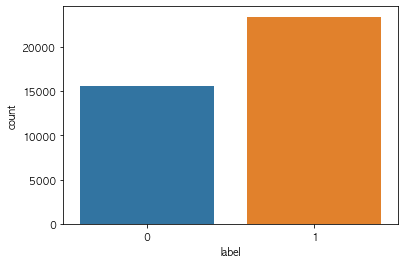

In [46]:
sns.countplot(x='label',data=df)

# Logistic Regression

In [47]:
X = df.drop('label',axis=1).values
y = df['label'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [50]:
%%timeit

logmodel.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/jedi/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/jedi/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

337 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


/opt/homebrew/Caskroom/miniforge/base/envs/jedi/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3796
           1       0.96      0.92      0.94      5956

    accuracy                           0.93      9752
   macro avg       0.93      0.93      0.93      9752
weighted avg       0.93      0.93      0.93      9752



In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[3582,  214],
       [ 454, 5502]])

# KNN

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
scaler.fit(df.drop('label',axis=1))

StandardScaler()

In [57]:
scaled_features = scaler.transform(df.drop('label', axis=1))

In [58]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [59]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)

In [62]:
%%timeit

knn.fit(X_train, y_train)

4.02 ms ± 560 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
predictions = knn.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/jedi/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[4553   41]
 [  75 7034]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4594
           1       0.99      0.99      0.99      7109

    accuracy                           0.99     11703
   macro avg       0.99      0.99      0.99     11703
weighted avg       0.99      0.99      0.99     11703



# Support Vector Machine

In [65]:
from sklearn.model_selection import train_test_split
X = df.drop('label',axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [66]:
from sklearn.svm import SVC
svc_model = SVC()

In [67]:
%%timeit

svc_model.fit(X_train,y_train)

8.43 s ± 65.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[4485  245]
 [1043 5930]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4730
           1       0.96      0.85      0.90      6973

    accuracy                           0.89     11703
   macro avg       0.89      0.90      0.89     11703
weighted avg       0.90      0.89      0.89     11703

